In [46]:
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
from google.colab import drive

In [48]:
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
%cd /content/drive/MyDrive

In [ ]:
# %ls 'introductionToComputationalImmunology/data'

In [51]:
%cd 'introductionToComputationalImmunology/data'

In [ ]:
# !ls '/content/drive/MyDrive/introductionToComputationalImmunology/data/trust4-output'

In [ ]:
for root, dirs, files in os.walk("/content/drive/MyDrive/introductionToComputationalImmunology/data/trust4-output"):
  for f in files:
    if f.endswith("_airr.tsv"):
      print(f.split('_')[1] + '_' + f.split('_')[2])

HG006_igk
HG007_igl
HG007_igh
HG006_igl
HG007_igk
HG005_igk
HG004_igl
HG005_igh
HG003_igl
HG005_igl
HG004_igh
HG004_igk
HG006_igh
HG003_igk
HG003_igh
HG002_igk
HG002_igl
HG002_igh


In [ ]:
%pwd

/content/drive/MyDrive/introductionToComputationalImmunology/data


In [ ]:
%cd trust4-output

/content/drive/MyDrive/introductionToComputationalImmunology/data/trust4-output


In [ ]:
txts = pd.DataFrame()
names = []
for root, dirs, files in os.walk("/content/drive/MyDrive/introductionToComputationalImmunology/data/trust4-output"):
  for f in sorted(files):
    if f.endswith("_airr.tsv"):
      text = pd.read_csv(f, sep='\t')
      txts = pd.concat([txts, text], axis=0)
      for i in range(text.shape[0]):
        names.append(f.split('_')[1] + '_' + f.split('_')[2])

txts['cLine_loci'] = names

In [ ]:
txts.columns

Index(['sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call',
       'j_call', 'c_call', 'sequence_alignment', 'germline_alignment', 'cdr1',
       'cdr2', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar',
       'v_identity', 'j_identity', 'cell_id', 'complete_vdj',
       'consensus_count', 'cLine_loci'],
      dtype='object')

In [ ]:
txts.shape

(29, 23)

In [ ]:
cellLines = txts[['v_call', 'd_call', 'j_call', 'cLine_loci', 'sequence', 'sequence_alignment', 'germline_alignment', 'productive']].drop_duplicates().reset_index().drop('index', axis=1)
cellLines['v_gene'] = cellLines['v_call'].str.split('*').str[0]
cellLines['d_gene'] = cellLines['d_call'].str.split('*').str[0]
cellLines['j_gene'] = cellLines['j_call'].str.split('*').str[0]
cellLines.head()

,v_call,d_call,j_call,cLine_loci,sequence,sequence_alignment,germline_alignment,productive,v_gene,d_gene,j_gene
0,IGHV3-29*01,IGHD6-19*01,NaN,HG002_igh,ATTAAGCTGAATTTTTCTTGTTGGTATTTTAAAAGGTAACTCATAG...,NaN,NaN,F,IGHV3-29,IGHD6-19,NaN
1,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
2,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
3,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
4,IGHV4-61*02,IGHD4-17*01,IGHJ6*02,HG004_igh,TTTCTGAGAGTCCTGGACCTCCTGTGCACGAACATGAAACCTCTGT...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGGAGCCTTCAC...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,T,IGHV4-61,IGHD4-17,IGHJ6


In [ ]:
cellLines.cLine_loci.unique()

array(['HG002_igh', 'HG002_igl', 'HG004_igh', 'HG004_igk', 'HG004_igl',
       'HG005_igh', 'HG005_igk', 'HG005_igl', 'HG006_igh', 'HG006_igk',
       'HG006_igl', 'HG007_igl'], dtype=object)

In [ ]:
# cellLines.to_csv('cellLines.csv')

In [ ]:
cellLines.shape

(29, 11)

In [ ]:
cellLines['d_call'].str.split('*').str[0]

0     IGHD6-19
1          NaN
2          NaN
3          NaN
4     IGHD4-17
5     IGHD5-18
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14    IGHD5-12
15    IGHD1-26
16    IGHD3-10
17     IGHD3-9
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23     IGHD3-3
24    IGHD3-10
25     IGHD3-3
26         NaN
27         NaN
28         NaN
Name: d_call, dtype: object

In [ ]:
%ls '/content/drive/MyDrive/introductionToComputationalImmunology/data/depth-tables'

all_samples.csv            HG004_igh_depth-table.csv  HG006_igk_depth-table.csv
HG002_igh_depth-table.csv  HG004_igk_depth-table.csv  HG006_igl_depth-table.csv
HG002_igk_depth-table.csv  HG004_igl_depth-table.csv  HG007_igh_depth-table.csv
HG002_igl_depth-table.csv  HG005_igh_depth-table.csv  HG007_igk_depth-table.csv
HG003_igh_depth-table.csv  HG005_igk_depth-table.csv  HG007_igl_depth-table.csv
HG003_igk_depth-table.csv  HG005_igl_depth-table.csv
HG003_igl_depth-table.csv  HG006_igh_depth-table.csv


In [ ]:
%cd '/content/drive/MyDrive/introductionToComputationalImmunology/data/depth-tables'

/content/drive/MyDrive/introductionToComputationalImmunology/data/depth-tables


In [ ]:
samples = pd.DataFrame()
for root, dirs, files in os.walk('/content/drive/MyDrive/introductionToComputationalImmunology/data/depth-tables'):
  for f in sorted(files):
    print(f)
    if f.endswith(".csv"):
      csv = pd.read_csv(f)
      csv['sample_family'] = f.split('_')[0] + '_' + f.split('_')[1]
      samples = pd.concat([samples, csv], axis=0)

HG002_igh_depth-table.csv
HG002_igk_depth-table.csv
HG002_igl_depth-table.csv
HG003_igh_depth-table.csv
HG003_igk_depth-table.csv
HG003_igl_depth-table.csv
HG004_igh_depth-table.csv
HG004_igk_depth-table.csv
HG004_igl_depth-table.csv
HG005_igh_depth-table.csv
HG005_igk_depth-table.csv
HG005_igl_depth-table.csv
HG006_igh_depth-table.csv
HG006_igk_depth-table.csv
HG006_igl_depth-table.csv
HG007_igh_depth-table.csv
HG007_igk_depth-table.csv
HG007_igl_depth-table.csv
all_samples.csv


In [ ]:
samples

,start,end,len,sample_family,Unnamed: 0,gene,del_start,del_stop,gene_annot_start,gene_annot_stop,inBoundsLeft,inBoundsRight,start_stop,ss
0,105864636.0,105881261.0,16625.0,HG002_igh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106728172.0,106739779.0,11607.0,HG002_igh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106759065.0,106761324.0,2259.0,HG002_igh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,106718552.0,106720309.0,1757.0,HG002_igh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105635574.0,105637304.0,1730.0,HG002_igh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344795,NaN,NaN,NaN,all_samples.csv,344795.0,IGHVII-78-1,22221421.0,22221430.0,106865621.0,106865895.0,False,True,"(22221421, 22221430)",2.222142e+15
344796,NaN,NaN,NaN,all_samples.csv,344796.0,IGHV3-79,22221421.0,22221430.0,106867640.0,106868092.0,False,True,"(22221421, 22221430)",2.222142e+15
344797,NaN,NaN,NaN,all_samples.csv,344797.0,IGHV4-80,22221421.0,22221430.0,106872783.0,106873186.0,False,True,"(22221421, 22221430)",2.222142e+15
344798,NaN,NaN,NaN,all_samples.csv,344798.0,IGHV7-81,22221421.0,22221430.0,106874581.0,106875017.0,False,True,"(22221421, 22221430)",2.222142e+15


In [ ]:
igh_genes = pd.read_csv('/content/drive/MyDrive/introductionToComputationalImmunology/data/gene-annotations/igh-gene-annotation.csv', header=1)
igk_genes = pd.read_csv('/content/drive/MyDrive/introductionToComputationalImmunology/data/gene-annotations/igk-gene-annotation.csv', header=1)
igl_genes = pd.read_csv('/content/drive/MyDrive/introductionToComputationalImmunology/data/gene-annotations/igl-gene-annotation.csv', header=1)
igh_genes.columns

Index(['Accession', 'Start', 'Stop', 'Gene symbol', 'Strand', 'NCBI Gene ID',
       'Name'],
      dtype='object')

In [ ]:
igh_genes.columns[3]

'Gene symbol'

In [ ]:
igh_genes.rename(columns={igh_genes.columns[3]:'Gene_Symbol'}, inplace=True)
igk_genes.rename(columns={igk_genes.columns[3]:'Gene_Symbol'}, inplace=True)
igl_genes.rename(columns={igl_genes.columns[3]:'Gene_Symbol'}, inplace=True)
igl_genes.head()

,Accession,Start,Stop,Gene_Symbol,Strand,NCBI Gene ID,Name
0,NC_000022.11,21991099,22043934,PRAMENP,minus,649179,"PRAME N-terminal like, pseudogene"
1,NC_000022.11,22026076,22922913,IGL,plus,3535,immunoglobulin lambda locus
2,NC_000022.11,22026076,22026553,IGLVI-70,plus,28763,immunoglobulin lambda variable (I)-70 (pseudog...
3,NC_000022.11,22030994,22031472,IGLV4-69,plus,28784,immunoglobulin lambda variable 4-69
4,NC_000022.11,22032902,22033205,IGLVI-68,plus,28764,immunoglobulin lambda variable (I)-68 (pseudog...


In [ ]:
ig_hkl_annots = pd.concat([igh_genes, igk_genes, igl_genes], axis=0)

In [ ]:
ig_hkl_annots = ig_hkl_annots.sort_values('Start', ascending=True)
ig_hkl_annots.head()

,Accession,Start,Stop,Gene_Symbol,Strand,NCBI Gene ID,Name
0,NC_000022.11,21991099,22043934,PRAMENP,minus,649179,"PRAME N-terminal like, pseudogene"
1,NC_000022.11,22026076,22922913,IGL,plus,3535,immunoglobulin lambda locus
2,NC_000022.11,22026076,22026553,IGLVI-70,plus,28763,immunoglobulin lambda variable (I)-70 (pseudog...
3,NC_000022.11,22030994,22031472,IGLV4-69,plus,28784,immunoglobulin lambda variable 4-69
4,NC_000022.11,22032902,22033205,IGLVI-68,plus,28764,immunoglobulin lambda variable (I)-68 (pseudog...


In [ ]:
ig_hkl_annots['Len'] = ig_hkl_annots['Stop'] - ig_hkl_annots['Start'] + 1
ig_hkl_annots.head()

,Accession,Start,Stop,Gene_Symbol,Strand,NCBI Gene ID,Name,Len
0,NC_000022.11,21991099,22043934,PRAMENP,minus,649179,"PRAME N-terminal like, pseudogene",52836
1,NC_000022.11,22026076,22922913,IGL,plus,3535,immunoglobulin lambda locus,896838
2,NC_000022.11,22026076,22026553,IGLVI-70,plus,28763,immunoglobulin lambda variable (I)-70 (pseudog...,478
3,NC_000022.11,22030994,22031472,IGLV4-69,plus,28784,immunoglobulin lambda variable 4-69,479
4,NC_000022.11,22032902,22033205,IGLVI-68,plus,28764,immunoglobulin lambda variable (I)-68 (pseudog...,304


In [ ]:
ig_hkl_annots = ig_hkl_annots.reset_index().drop('index', axis=1)

In [ ]:
ig_hkl_annots.Start[0]

21991099

In [ ]:
samples = samples.reset_index().drop('index', axis=1)

In [ ]:
g_symbol = []
delStart = []
delStop = []
gene_annot_start = []
gene_annot_stop = []
inLeft = []
inRight = []
samFam = []
for i in range(samples.shape[0]):
  for j in range(ig_hkl_annots.shape[0]):
    if (samples.start[i] >= ig_hkl_annots.Start[j]) and (samples.end[i] <= ig_hkl_annots.Stop[j]):
      # partial "hit"? one in bounds and one out, left in and right out or right in and left out
      g_symbol.append(ig_hkl_annots.Gene_Symbol[j])
      gene_annot_start.append(ig_hkl_annots.Start[j])
      gene_annot_stop.append(ig_hkl_annots.Stop[j])
      delStart.append(samples.start[i]) 
      delStop.append(samples.end[i])
      samFam.append(samples.sample_family[i])
      inLeft.append(True)
      inRight.append(True)
    elif (samples.start[i] >= ig_hkl_annots.Start[j]) or (samples.end[i] <= ig_hkl_annots.Stop[j]):
      if (samples.start[i] >= ig_hkl_annots.Start[j]):
        inLeft.append(True)
        inRight.append(False)
      else:
        inLeft.append(False)
        inRight.append(True)
      g_symbol.append(ig_hkl_annots.Gene_Symbol[j])
      gene_annot_start.append(ig_hkl_annots.Start[j])
      gene_annot_stop.append(ig_hkl_annots.Stop[j])
      delStart.append(samples.start[i]) 
      delStop.append(samples.end[i])
      samFam.append(samples.sample_family[i])
gene_table = pd.DataFrame({'gene':g_symbol, 'del_start':delStart, 'del_stop':delStop, 'gene_annot_start':gene_annot_start, 'gene_annot_stop':gene_annot_stop, 'inBoundsLeft':inLeft, 'inBoundsRight':inRight, 'sample_family':samFam})
gene_table = gene_table.drop_duplicates()

In [ ]:
gene_table.shape

(344800, 8)

In [ ]:
gene_table['start_stop'] = list(zip(gene_table['del_start'], gene_table['del_stop']))
# gene_table['start_stop'] = str(gene_table['del_start']) + str(gene_table['del_stop'])
gene_table

,gene,del_start,del_stop,gene_annot_start,gene_annot_stop,inBoundsLeft,inBoundsRight,sample_family,start_stop
0,PRAMENP,105864636,105881261,21991099,22043934,True,False,HG002_igh,"(105864636, 105881261)"
1,IGL,105864636,105881261,22026076,22922913,True,False,HG002_igh,"(105864636, 105881261)"
2,IGLVI-70,105864636,105881261,22026076,22026553,True,False,HG002_igh,"(105864636, 105881261)"
3,IGLV4-69,105864636,105881261,22030994,22031472,True,False,HG002_igh,"(105864636, 105881261)"
4,IGLVI-68,105864636,105881261,22032902,22033205,True,False,HG002_igh,"(105864636, 105881261)"
...,...,...,...,...,...,...,...,...,...
344795,IGHVII-78-1,22221421,22221430,106865621,106865895,False,True,HG007_igl,"(22221421, 22221430)"
344796,IGHV3-79,22221421,22221430,106867640,106868092,False,True,HG007_igl,"(22221421, 22221430)"
344797,IGHV4-80,22221421,22221430,106872783,106873186,False,True,HG007_igl,"(22221421, 22221430)"
344798,IGHV7-81,22221421,22221430,106874581,106875017,False,True,HG007_igl,"(22221421, 22221430)"


In [ ]:
print(gene_table.gene.nunique())
gene_table.gene.unique()

417


array(['PRAMENP', 'IGL', 'IGLVI-70', 'IGLV4-69', 'IGLVI-68', 'IGLV10-67',
       'IGLVIV-66-1', 'IGLVV-66', 'IGLVIV-65', 'IGLVIV-64', 'IGLVI-63',
       'IGLV1-62', 'LOC102724653', 'IGLV8-61', 'LOC100736408',
       'ABHD17AP5', 'IGLV4-60', 'SOCS2P2', 'IGLVIV-59', 'IGLVV-58',
       'BMP6P1', 'IGLV6-57', 'IGLVI-56', 'IGLV11-55', 'LOC100419915',
       'IGLV10-54', 'IGLVIV-53', 'TOP3BP1', 'LOC100533679', 'VPREB1',
       'LOC124905087', 'LOC105372952', 'BMS1P20', 'IGLV5-52', 'IGLV1-51',
       'IGLV1-50', 'ASH2LP3', 'IGLV9-49', 'IGLV5-48', 'IGLV1-47',
       'ASH2LP2', 'IGLV7-46', 'IGLV5-45', 'IGLV1-44', 'IGLV7-43',
       'IGLVI-42', 'IGLVVII-41-1', 'LOC101929255', 'IGLV1-41', 'IGLV1-40',
       'ASH2LP1', 'IGLVI-38', 'IGLV5-37', 'IGLV1-36', 'LOC100736412',
       'IGLV7-35', 'ZNF280B', 'ZNF280A', 'LOC124905161', 'PRAME',
       'LL22NC03-63E9.3', 'IGLV2-34', 'IGLV2-33', 'IGLV3-32', 'IGLV3-31',
       'IGLV3-30', 'BCRP4', 'POM121L1P', 'GGTLC2', 'LOC129026',
       'IGLV3-29', 'IGLV2-28

In [ ]:
ss = [str(x[0])+str(x[1]) for x in gene_table['start_stop']]

In [ ]:
gene_table['ss'] = ss
gene_table.head()

,gene,del_start,del_stop,gene_annot_start,gene_annot_stop,inBoundsLeft,inBoundsRight,sample_family,start_stop,ss
0,PRAMENP,105864636,105881261,21991099,22043934,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261
1,IGL,105864636,105881261,22026076,22922913,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261
2,IGLVI-70,105864636,105881261,22026076,22026553,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261
3,IGLV4-69,105864636,105881261,22030994,22031472,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261
4,IGLVI-68,105864636,105881261,22032902,22033205,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261


In [ ]:
# gene_table.to_csv('all_samples.csv')

In [ ]:
cellLines.columns

In [ ]:
cellLines[[]].loc[:2]

,v_call,d_call,j_call,cLine_loci,sequence,sequence_alignment,germline_alignment,productive,v_gene,d_gene,j_gene
0,IGHV3-29*01,IGHD6-19*01,NaN,HG002_igh,ATTAAGCTGAATTTTTCTTGTTGGTATTTTAAAAGGTAACTCATAG...,NaN,NaN,F,IGHV3-29,IGHD6-19,NaN
1,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
2,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3


In [ ]:
cellLines.head()

,v_call,d_call,j_call,cLine_loci,sequence,sequence_alignment,germline_alignment,productive,v_gene,d_gene,j_gene
0,IGHV3-29*01,IGHD6-19*01,NaN,HG002_igh,ATTAAGCTGAATTTTTCTTGTTGGTATTTTAAAAGGTAACTCATAG...,NaN,NaN,F,IGHV3-29,IGHD6-19,NaN
1,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
2,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
3,IGLV2-14*01,NaN,IGLJ3*02,HG002_igl,ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T,IGLV2-14,NaN,IGLJ3
4,IGHV4-61*02,IGHD4-17*01,IGHJ6*02,HG004_igh,TTTCTGAGAGTCCTGGACCTCCTGTGCACGAACATGAAACCTCTGT...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGGAGCCTTCAC...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,T,IGHV4-61,IGHD4-17,IGHJ6


In [ ]:
le = preprocessing.LabelEncoder()
gene_table['gene_regions'] = le.fit_transform(gene_table['ss'])

In [ ]:
gene_table.head()

,gene,del_start,del_stop,gene_annot_start,gene_annot_stop,inBoundsLeft,inBoundsRight,sample_family,start_stop,ss,gene_regions
0,PRAMENP,105864636,105881261,21991099,22043934,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261,68
1,IGL,105864636,105881261,22026076,22922913,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261,68
2,IGLVI-70,105864636,105881261,22026076,22026553,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261,68
3,IGLV4-69,105864636,105881261,22030994,22031472,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261,68
4,IGLVI-68,105864636,105881261,22032902,22033205,True,False,HG002_igh,"(105864636, 105881261)",105864636105881261,68


In [ ]:
gene_table.gene.unique()[:10]

array(['PRAMENP', 'IGL', 'IGLVI-70', 'IGLV4-69', 'IGLVI-68', 'IGLV10-67',
       'IGLVIV-66-1', 'IGLVV-66', 'IGLVIV-65', 'IGLVIV-64'], dtype=object)

In [ ]:
# gene_table[gene_table['gene'] == 'IGLVI-70']

# the gene regions can be reduced, if necessary, 
# to min del_start and max del_stop
# this would yield one row for some given gene with more than one observation

,gene,del_start,del_stop,start_stop,ss,gene_regions
2,IGLVI-70,105864636,105881261,"(105864636, 105881261)",105864636105881261,13
413,IGLVI-70,106728172,106739779,"(106728172, 106739779)",106728172106739779,40
829,IGLVI-70,106759065,106761324,"(106759065, 106761324)",106759065106761324,66
1246,IGLVI-70,106718552,106720309,"(106718552, 106720309)",106718552106720309,29
1663,IGLVI-70,105635574,105637304,"(105635574, 105637304)",105635574105637304,5
...,...,...,...,...,...,...
25849,IGLVI-70,105688527,105688538,"(105688527, 105688538)",105688527105688538,6
26266,IGLVI-70,106744125,106744134,"(106744125, 106744134)",106744125106744134,51
26683,IGLVI-70,106745915,106745923,"(106745915, 106745923)",106745915106745923,53
27100,IGLVI-70,106747556,106747561,"(106747556, 106747561)",106747556106747561,55


In [ ]:
pd.DataFrame(gene_table['gene'].value_counts())

,gene
PRAMENP,67
RPS8P1,67
IGHV3-7,67
IGHV3-6,67
IGHVIII-5-2,67
...,...
IGHJ2,66
IGHJ1,66
IGHD7-27,66
IGHJ1P,66


In [ ]:
gene_table.shape

(27932, 6)

In [ ]:
gene_table.gene_regions.nunique()

67

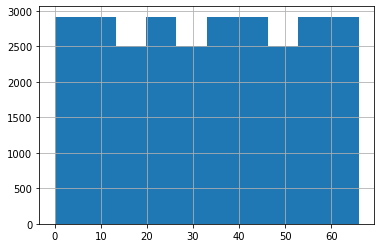

In [ ]:
_ = gene_table.gene_regions.hist()

In [ ]:
# geneList = np.unique(list(cellLines.v_gene.unique()) + list(cellLines.d_gene.unique()) + list(cellLines.j_gene.unique()))[:-1]
# print(len(geneList))
# geneList

# cellLines[cellLines['v_gene'] == 'IGLVI-70']

In [ ]:
cellLines.columns

Index(['v_call', 'd_call', 'j_call', 'cLine_loci', 'sequence',
       'sequence_alignment', 'germline_alignment', 'productive', 'v_gene',
       'd_gene', 'j_gene'],
      dtype='object')

In [ ]:
cellLines['vdj_concat'] = list(zip(cellLines['v_gene'], cellLines['d_gene'], cellLines['j_gene']))
cellLines[['cLine_loci', 'v_gene', 'd_gene', 'j_gene', 'vdj_concat', 'sequence', 'sequence_alignment', 'germline_alignment', 'productive']].head()

,cLine_loci,v_gene,d_gene,j_gene,vdj_concat,sequence,sequence_alignment,germline_alignment,productive
0,HG002_igh,IGHV3-29,IGHD6-19,NaN,"(IGHV3-29, IGHD6-19, nan)",ATTAAGCTGAATTTTTCTTGTTGGTATTTTAAAAGGTAACTCATAG...,NaN,NaN,F
1,HG002_igl,IGLV2-14,NaN,IGLJ3,"(IGLV2-14, nan, IGLJ3)",ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T
2,HG002_igl,IGLV2-14,NaN,IGLJ3,"(IGLV2-14, nan, IGLJ3)",ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T
3,HG002_igl,IGLV2-14,NaN,IGLJ3,"(IGLV2-14, nan, IGLJ3)",ATCCTGCCATCAGAATAGATAAACAAGGACTTTAATCTCAGCTGAG...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,CAGTCTGCCCTGACTCAGCCTGCCTCCGTGTCTGGGTCTCCTGGAC...,T
4,HG004_igh,IGHV4-61,IGHD4-17,IGHJ6,"(IGHV4-61, IGHD4-17, IGHJ6)",TTTCTGAGAGTCCTGGACCTCCTGTGCACGAACATGAAACCTCTGT...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGGAGCCTTCAC...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,T


In [ ]:
a = ('IGHV3-29', 'IGHD6-19', 'nan')
if 'IGHV3-29' in a:
  print(a[2])

nan
